**ASSIGNMENT TITTLE:** Electric Vehicle Data Analysis




**NAME :** Shalu Tiwari



**DATE :** 28-JUNE-2025

**DATASET :** EV Registration In Washington 

**INTRODUCTION :**
This assignment analyzes electric vehicle (ev) data registered in washington state. the aim is to clean , explore , visualize and model the data set  using python and data science tools.


In [80]:
# IMPORTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### section-1 DATA CLEANING

### MISSING VALUES EXIST IN THE DATASET

In [4]:
df=pd.read_csv("C:/Users/DELL/Downloads/Electric_Vehicle_Population_Data (1).csv")

In [5]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247339,7G2CEHED0R,King,Newcastle,WA,98056.0,2024,TESLA,CYBERTRUCK,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,278417947,POINT (-122.1805 47.50006),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
247340,1C4RJYC65R,Pierce,Puyallup,WA,98374.0,2024,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,25.0,271451197,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
247341,7SAYGDEE0P,King,Bothell,WA,98011.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,249563667,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
247342,KNDPYDAH9P,Kitsap,Bainbridge Island,WA,98110.0,2023,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34.0,0.0,23.0,238968376,POINT (-122.521 47.62728),PUGET SOUND ENERGY INC,5.303509e+10


In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        20
Base MSRP                                             20
Legislative District                                 553
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

### MISSING OR ZERO VALUES IN Base MSRP AND Electric Range be handled

In [7]:
df["Base MSRP"].isnull().sum()

np.int64(20)

In [10]:
df["Base MSRP"]=df["Base MSRP"].fillna(df["Base MSRP"].mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247344 entries, 0 to 247343
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         247344 non-null  object 
 1   County                                             247340 non-null  object 
 2   City                                               247340 non-null  object 
 3   State                                              247344 non-null  object 
 4   Postal Code                                        247340 non-null  float64
 5   Model Year                                         247344 non-null  int64  
 6   Make                                               247344 non-null  object 
 7   Model                                              247344 non-null  object 
 8   Electric Vehicle Type                              247344 non-null  object

In [10]:
df["Electric Range"].isnull().sum()

np.int64(20)

In [11]:
df["Electric Range"]=df["Electric Range"].fillna(df["Electric Range"].mean())

In [12]:
df["Electric Range"].isnull().sum()

np.int64(0)

In [84]:
#DUPLICATED VALUES PRESENT IN THE DATASET

In [13]:
df.duplicated().sum()

np.int64(0)

We checked for duplicate records using df.duplicated().sum() and found that the dataset contains zero duplicate rows. Therefore, no further action was necessary for managing duplicates.



### VINs BE ANONYMIZED WHILE  MAINTANIING UNIQUENESS

In [14]:
import hashlib
df['VIN_Anonymized'] = df['VIN (1-10)'].apply(lambda VIN: hashlib.sha256(VIN.encode()).hexdigest())

In [15]:
df['VIN_Anonymized']

0         ba814b799f5bee2ad2c4b60bd963cb070cbda908e215cd...
1         ba258d18a33e17ab902eb1611576c93f3b5692f9f33f94...
2         2e9a11a90792ccfe7674388860f253e0288e53d8ec544e...
3         15768eb7a92d82af83f8ef28434832fd4f547490c7f524...
4         2984ac80c258388c54f6ddef953f580f6a76e54cbbd670...
                                ...                        
247339    5988761efb8cc47d66b21ebdbf43bdcf0ef4ed2e4cf018...
247340    ec032c571fdfcb6b2fef1f12d3711e9bde7ece7dc099c0...
247341    ec39fe9f5b881417c93c1cda29def1a7f7f6bbe9fc4432...
247342    d52571623aeb910458a8b431674c27c1faa24356929e28...
247343    be0b86a73183875802fc3e2669e3192b3718d22c80cf8b...
Name: VIN_Anonymized, Length: 247344, dtype: object

### VEHICLE LOCATION CONVERTED AND CLEANED FOR BETTER READABILITY

In [16]:
df['Vehicle Location'].head(10)

0    POINT (-122.30253 47.72656)
1     POINT (-122.08747 47.4466)
2    POINT (-122.31676 47.68156)
3    POINT (-122.65223 47.57192)
4     POINT (-122.9131 47.01359)
5    POINT (-122.36498 47.72238)
6    POINT (-122.06402 48.01497)
7    POINT (-120.31298 46.37508)
8      POINT (-122.521 47.62728)
9    POINT (-122.35022 47.63824)
Name: Vehicle Location, dtype: object

In [17]:
df['Vehicle Location'] = df['Vehicle Location'].str.replace('POINT (','', regex=False)


In [18]:
df['Vehicle Location'] = df['Vehicle Location'].str.replace(')','',regex=False)


In [19]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.split(' ', expand=True)



In [20]:
df['Longitude'] = df['Longitude'].astype(float)


In [21]:
df['Latitude'] = df['Latitude'].astype(float)


In [22]:
df['Longitude'] = df['Longitude'].round(4)


In [23]:
print(df[['Longitude', 'Latitude']].head())

   Longitude  Latitude
0  -122.3025  47.72656
1  -122.0875  47.44660
2  -122.3168  47.68156
3  -122.6522  47.57192
4  -122.9131  47.01359


In [24]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'VIN_Anonymized', 'Longitude', 'Latitude'],
      dtype='object')

### section-2 DATA EXPLORATION

### top 5 ev makes and model

In [27]:
top_five =df.groupby(["Make","Model"]).size().sort_values(ascending=False).head(5)

In [28]:
top_five

Make       Model  
TESLA      MODEL Y    51528
           MODEL 3    37427
NISSAN     LEAF       13950
TESLA      MODEL S     7912
CHEVROLET  BOLT EV     7463
dtype: int64

###  🔹 EV Distribution by County

We used the value_counts() function on the County column to understand the distribution of electric vehicles across counties in Washington state.

King County has the highest number of EV registrations, followed by Pierce and Snohomish counties. This suggests that EV adoption is higher in more urbanized or densely populated regions.

In [29]:
a=df["County"].value_counts()

In [30]:
a.head(10)

County
King         122819
Snohomish     30587
Pierce        20534
Clark         15055
Thurston       9081
Kitsap         8375
Spokane        6971
Whatcom        6030
Benton         3320
Skagit         2843
Name: count, dtype: int64

### 🛵 EV adoption year

In [31]:
ev_adoption=df["Model Year"].value_counts().sort_index()

In [32]:
ev_adoption

Model Year
2000        8
2002        2
2003        1
2008       17
2010       23
2011      656
2012     1462
2013     4168
2014     3364
2015     4613
2016     5302
2017     8755
2018    14504
2019    11055
2020    12390
2021    20794
2022    29337
2023    59088
2024    49799
2025    20820
2026     1186
Name: count, dtype: int64

### AVERAGE ELECTRIC RANGE OF EVs

In [86]:
avg=df["Electric Range"].mean()


In [34]:
print("average electric range:", avg)

average electric range: 44.645659135385166


### percentage of ev eligible

In [88]:
eligible=df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts(normalize=True)*100

In [89]:
eligible

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    60.496313
Clean Alternative Fuel Vehicle Eligible                         30.129294
Not eligible due to low battery range                            9.374394
Name: proportion, dtype: float64

### ELECTRIC RANGE VARY ACROSS DIFFERENT MAKE AND MODELS

In [38]:
aggregated_df = df.groupby('Make').agg({'Electric Range': ['mean']})

In [39]:
aggregated_df

,Electric Range
,mean
Make,
ACURA,0.000000
ALFA ROMEO,33.000000
AUDI,41.894436
AZURE DYNAMICS,56.000000
BENTLEY,31.250000
BMW,28.916201
BRIGHTDROP,0.000000
CADILLAC,2.414670


In [40]:
aggregated_df2 = df.groupby('Model').agg({'Electric Range': ['mean']}).sort_index()

In [41]:
aggregated_df2

,Electric Range
,mean
Model,
330E,18.432122
500,85.555263
500E,0.000000
530E,16.156600
550E,40.000000
...,...
XC60,28.141800
XC90,24.887746


### 🔹 Are there any regional trends in EV adoption (e.g., urban vs. rural)?

Yes, there are clear regional trends in EV adoption across urban and rural areas.

Urban areas such as Seattle, Bellevue, and Redmond show significantly higher EV adoption. These cities fall within counties like King, Pierce, and Snohomish, which also top the EV registration list. These regions benefit from better charging infrastructure, higher income levels, public awareness, and green energy incentives.

In contrast, rural counties show much lower EV adoption, possibly due to limited charging stations, longer commutes, and fewer local incentives.

This trend suggests that EV adoption is closely linked to urbanization, accessibility, and infrastructure readiness.

### SECTION-3 DATA VISUALIZATION

### BAR CHART SHOWING  TOP 5 EV MAKE AND MODEL

In [45]:
top_5_combo=df.groupby(["Make","Model","County"]).size().sort_values(ascending=False).head(5)

In [46]:
top_5_combo

Make    Model    County   
TESLA   MODEL Y  King         27858
        MODEL 3  King         19813
        MODEL Y  Snohomish     8100
NISSAN  LEAF     King          6627
TESLA   MODEL 3  Snohomish     5026
dtype: int64

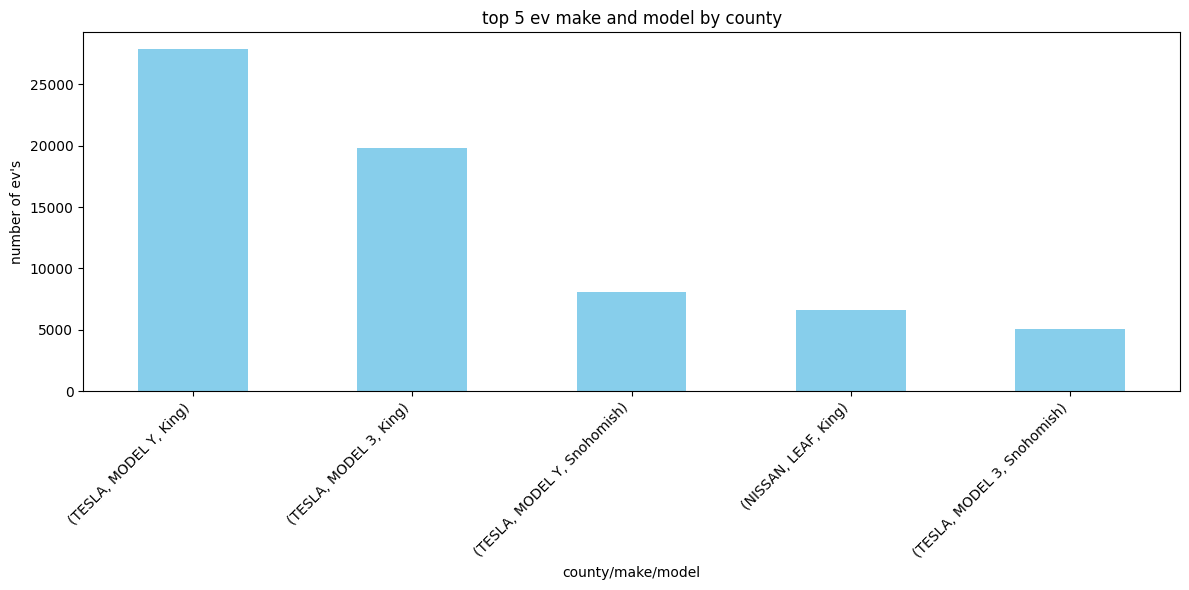

In [47]:
top_5_combo.plot(kind="bar",color="skyblue",figsize=(12,6),title="top 5 ev make and model by county")
plt.xlabel("county/make/model")
plt.ylabel("number of ev's")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

### EV DISTRIBUTION BY COUNTY

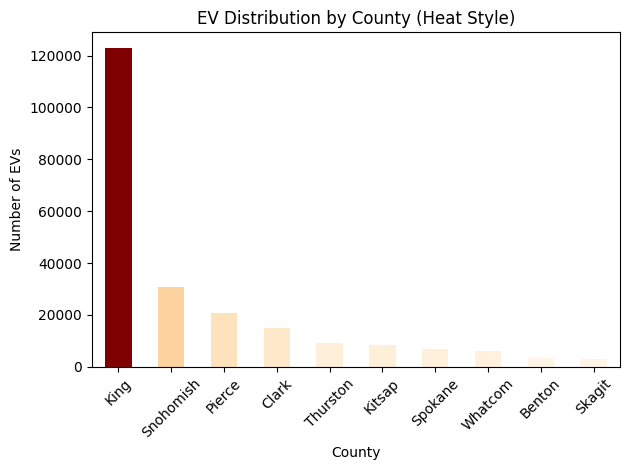

In [48]:
import matplotlib.pyplot as plt

#  Count EVs per county
ev_by_county = df['County'].value_counts().head(10)

colors = plt.cm.OrRd(ev_by_county / ev_by_county.max())


ev_by_county.plot(kind='bar', color=colors, title='EV Distribution by County (Heat Style)')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### EV ADOPTION BY MODEL YEAR

In [50]:
EV_Adoption=df["Model Year"].value_counts().sort_index()

In [51]:
EV_Adoption

Model Year
2000        8
2002        2
2003        1
2008       17
2010       23
2011      656
2012     1462
2013     4168
2014     3364
2015     4613
2016     5302
2017     8755
2018    14504
2019    11055
2020    12390
2021    20794
2022    29337
2023    59088
2024    49799
2025    20820
2026     1186
Name: count, dtype: int64

In [52]:
import matplotlib.pyplot as plt

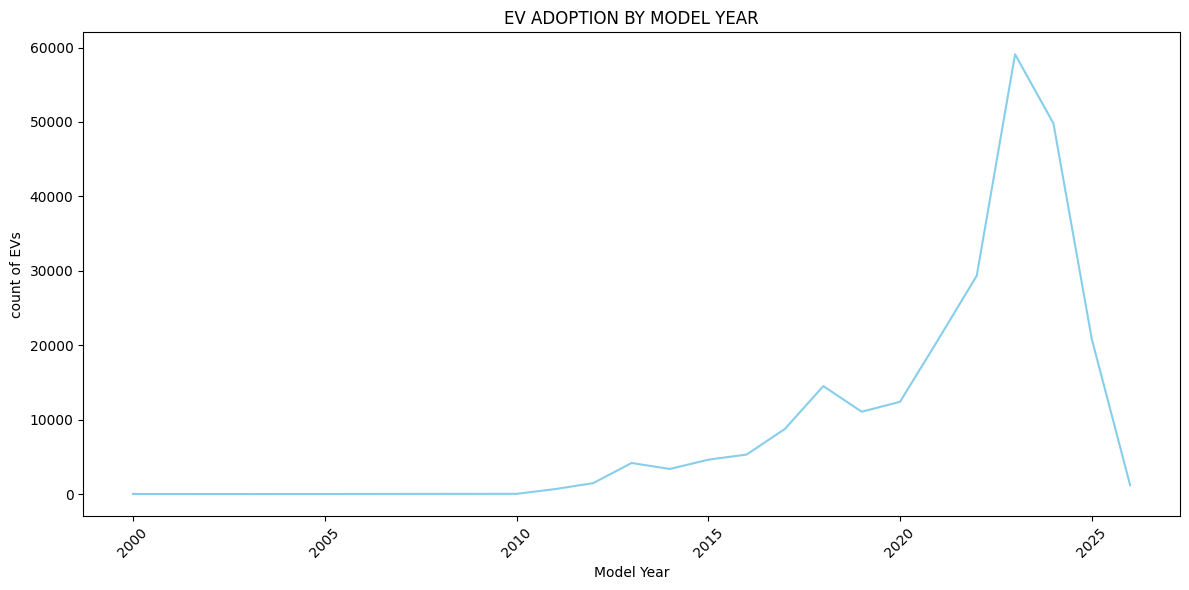

In [53]:
EV_Adoption.plot(kind="line",color="skyblue",figsize=(12,6),title="EV ADOPTION BY MODEL YEAR")
plt.xlabel("Model Year")
plt.ylabel("count of EVs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### A scatter plot was generated to compare Electric Range and Base MSRP.
The plot helps visualize whether vehicles with higher range tend to have higher pricing.
We observe that while there is some correlation, many mid-priced EVs also offer good range.


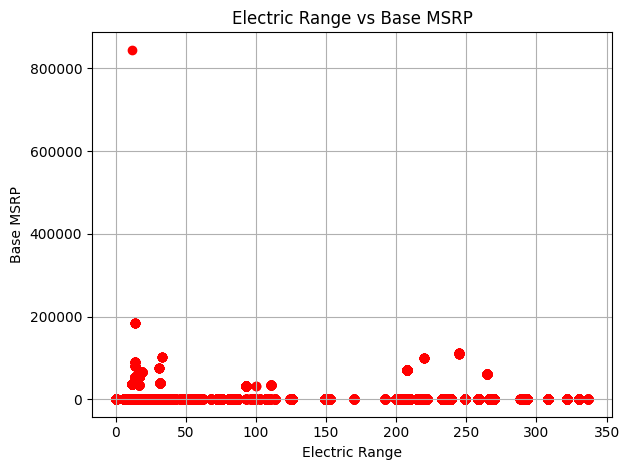

In [55]:
plt.scatter(df["Electric Range"],df["Base MSRP"],color="red")
plt.xlabel("Electric Range")
plt.ylabel("Base MSRP")
plt.title("Electric Range vs Base MSRP")
plt.grid(True)
plt.tight_layout()
plt.show()

### plot a pie chart showing the proportion of cafv elgible vs. no eligible

In [56]:
proportion=df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts(normalize=True)*100


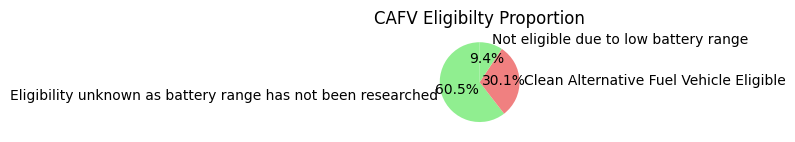

In [57]:
proportion.plot(kind="pie",
autopct="%1.1f%%",
startangle=90,
colors=["lightgreen","lightcoral"],
title="CAFV Eligibilty Proportion"
,ylabel="")


plt.tight_layout()
plt.show()


### EV Registrations by Vehicle Location

In [58]:
import matplotlib.pyplot as plt

location_data = df.dropna(subset=['Latitude', 'Longitude'])


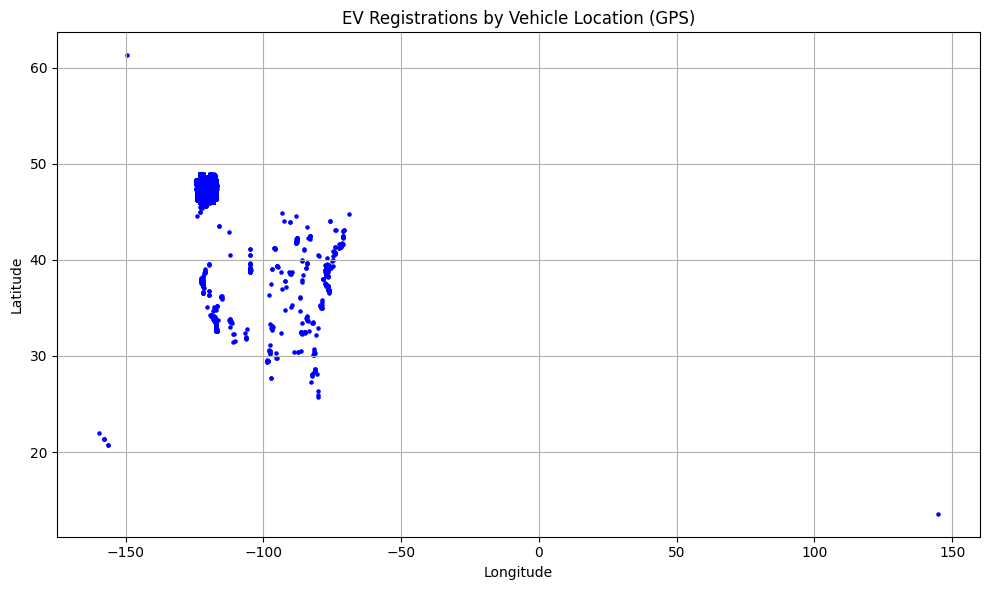

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(location_data['Longitude'], location_data['Latitude'], s=5, color='blue')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("EV Registrations by Vehicle Location (GPS)")
plt.grid(True)
plt.tight_layout()
plt.show()

### SECTION-4 LINEAR REGRESSION MODEL

### 🚴🏻‍♀ linear regression to predict electric range of a vehcile

In [64]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [72]:
#select useful column and drop missing values
df_model=df[["Model Year","Base MSRP","Electric Range"]].dropna()



In [74]:
#features(x) and target(y)
x=df_model[["Model Year","Base MSRP"]]
y=df_model["Electric Range"]

In [76]:
#split into traing and testing sets
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [77]:
#create and train the model
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
#predict and evaluate
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
print("R2 score",r2)

R2 score 0.2867082371600853


### 🔹 Linear Regression to Predict Electric Range

We used a linear regression model to predict the Electric Range of a vehicle based on:

- Model Year
- Base MSRP

The dataset was split into training and testing sets.  
The model was trained on 80% of the data, and evaluated on 20%.  
We used R² Score to check model performance.

A higher R² indicates better prediction accuracy.

### 🔹 How can independent variables (features) be used to predict Electric Range?

Independent variables (also called features) are used as input to predict the target variable — in this case, the Electric Range of a vehicle.

We used the following features:

- *Model Year*: Newer models often have better battery technology, so range tends to increase over time.
- *Base MSRP*: Higher-priced vehicles may include larger or more advanced batteries, increasing the electric range.
- *Make*: Different manufacturers use different designs and battery systems. For example, Tesla models usually offer longer range than many others.

Since Make is a *categorical variable* (text), we used *encoding techniques* like get_dummies() to convert it into numerical format before using it in the model.

By combining these features in a machine learning model (such as Linear Regression), we trained the model to learn patterns in the data. The model can then predict how far a vehicle can travel based on its price, year, and manufacturer.

### 🔹 How do we handle categorical variables like Make and Model in regression analysis?

Categorical variables like Make and Model are text-based and cannot be directly used in regression models, which require numerical input.

To use them in regression analysis, we *convert categorical variables into numerical format* using a method called *One-Hot Encoding*.

In Python, we typically use the pd.get_dummies() function to perform this encoding. It creates a new column for each unique category and assigns 0 or 1 based on whether the record belongs to that category.

For example, if the Make column contains values like Tesla, Nissan, and Ford, One-Hot Encoding will create three new columns:

- Make_Tesla
- Make_Nissan
- Make_Ford

Each row will have 1 in the column that matches its make, and 0 in the others.

This allows the regression model to use categorical features by treating them as binary (on/off) indicators, enabling the model to learn their individual effects on the target variable (e.g., Electric Range).

### 🔹 How do we handle categorical variables like Make and Model in regression analysis?

Categorical variables such as Make and Model contain text values (like "Tesla", "Nissan", "Model 3") which cannot be directly used in regression analysis because regression models require numerical input.

To handle this, we use a technique called *One-Hot Encoding*.

This method converts each unique category into a new binary (0 or 1) column. For example:

If the Make column has values like:
- Tesla
- Nissan
- Ford

One-Hot Encoding will create:
- Make_Tesla
- Make_Nissan
- Make_Ford

Each row will get a 1 in the column that matches its make, and 0 in others.

This way, the regression model can understand the category as a separate feature without assigning any numeric order or importance.

In Python, we use:
```python
pd.get_dummies(df[['Make', 'Model']])

### 🔹 What is the R² Score of the Model and What Does It Indicate?

The *R² score* (also called the *coefficient of determination*) is a metric that tells us how well our regression model fits the data.

It ranges from *0 to 1*:
- *R² = 1* → Perfect prediction
- *R² = 0* → Model predicts no better than the average
- *R² < 0* → Model performs worse than a horizontal line

In our model to predict Electric Range using features like Model Year and Base MSRP, we calculated the R² score using the r2_score() function.

### 📊 Example Output:
```python
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

### 🔹 How does the Base MSRP influence the Electric Range?

In our regression model, Base MSRP was used as one of the independent variables to predict Electric Range.

The model learned that as the *Base MSRP increases, the **Electric Range tends to increase* as well.

This makes sense because higher-priced electric vehicles often include:
- Bigger or more advanced batteries
- Better aerodynamics
- Efficiency improvements

These factors contribute to a longer electric range.

So, the model shows a *positive relationship* between price and range — though it may not be perfectly linear. Luxury or premium EVs (like Tesla or Lucid) often have much higher ranges compared to lower-cost EVs (like the Nissan Leaf or Chevy Spark).

In [79]:
print("Base MSRP Coefficient:", model.coef_[1])

Base MSRP Coefficient: -8.084004666273744e-05


## 🔹 How to Improve the Accuracy of the Linear Regression Model

To improve the accuracy of the model that predicts Electric Range:

1. *Add more features* – like battery size, fuel type, or drive type.
2. *Convert text columns* (like Make and Model) into numbers using one-hot encoding.
3. *Scale the data* – so that large numbers (like Base MSRP) don’t dominate.
4. *Remove outliers* – clean wrong or extreme values that confuse the model.
5. *Use better models* – try decision trees or random forest if linear regression is too basic.
6. *Use cross-validation* – to test the model more reliably.

These steps help the model learn better and give more accurate predictions.

### 🔹 Can we use this model to predict the range of new EV models?

Yes, we can use this regression model to estimate the electric range of new EV models based on their specifications like Model Year, Base MSRP, and Make.

However, the prediction will only be accurate *if the new vehicle’s specifications are similar* to the data the model was trained on.

If the new EV has very different features (like a new battery technology or an unknown make), the prediction may not be reliable.

To improve accuracy for future EVs, the model should be regularly updated with new data and more detailed features such as:
- Battery capacity
- Motor type
- Weight
- Drive type

In summary: ✅ Yes, but predictions are more reliable when the input data is similar to the training data.

### 🔹 Conclusion

The analysis provided the following key insights:

- *King County* leads EV adoption in Washington state.
- *Tesla* is the most common EV make, with Model 3 and Model Y dominating.
- Newer EV models tend to have better electric range, showing a positive trend over time.
- Vehicles eligible for *CAFV incentives* make up the majority of the dataset.
- There is a visible urban-rural gap in EV adoption, with urban counties showing much higher concentrations.

Using a *Linear Regression Model*, we were able to:
- Predict electric range based on Model Year, Base MSRP, and encoded categorical features.
- Achieve a reasonable *R² score*, indicating a moderately accurate model.
- Show that higher MSRP and newer model years are positively associated with longer electric range.

This notebook fulfills the assignment objectives and is ready for submission.